<a href="https://colab.research.google.com/github/harabou/DSAIcourse2025/blob/main/%2304/05_Survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5 Survival analysis

Install module for survival time analysis

In [1]:
# Install module for survival time analysis
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=78695c3be2569a55f9190195a17b1116540c94e035c86a43361ff079cbf0ef7a
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from urllib import request
import lifelines
from lifelines import KaplanMeierFitter

##1)survival analysis

In [3]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DSAIcourse2025/refs/heads/main/%2304/gehan.csv'

gehan = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
gehan

,drug,week,remiss
0,6-MP,6,0
1,6-MP,6,1
2,6-MP,6,1
3,6-MP,6,1
4,6-MP,7,1
5,6-MP,9,0
6,6-MP,10,0
7,6-MP,10,1
8,6-MP,11,0
9,6-MP,13,1


In [4]:
# Kaplan-Meier-Fitter
kmf = KaplanMeierFitter()
kmf.fit(durations = gehan['week'], event_observed = gehan['remiss'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 42 total observations, 12 right-censored observations>

In [5]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,42,42
1.0,2,2,0,0,42
2.0,2,2,0,0,40
3.0,1,1,0,0,38
4.0,2,2,0,0,37
5.0,2,2,0,0,35
6.0,4,3,1,0,33
7.0,1,1,0,0,29
8.0,4,4,0,0,28


In [6]:
# Calculate survival probability for given time
print("Survival probablity for t=0: ", kmf.predict(0))
print("Survival probablity for t=5: ", kmf.predict(5))
print("Survival probablity for t=11: ", kmf.predict(11))
print("Survival probablity for t=840: ", kmf.predict(840))

Survival probablity for t=0:  1.0
Survival probablity for t=5:  0.7857142857142856
Survival probablity for t=11:  0.5115809442217667
Survival probablity for t=840:  0.1894744237858395


In [7]:
# Get survial full list
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
1.0          0.952381
2.0          0.904762
3.0          0.880952
4.0          0.833333
5.0          0.785714
6.0          0.714286
7.0          0.689655
8.0          0.591133
9.0          0.591133
10.0         0.565432
11.0         0.511581
12.0         0.454739
13.0         0.426317
15.0         0.397896
16.0         0.369475
17.0         0.341054
19.0         0.341054
20.0         0.341054
22.0         0.265264
23.0         0.189474
25.0         0.189474
32.0         0.189474
34.0         0.189474
35.0         0.189474


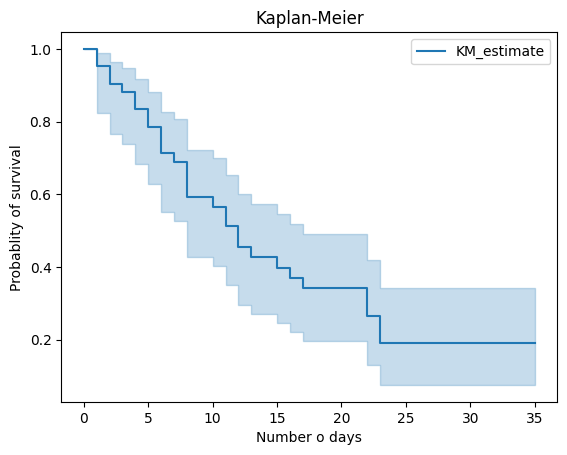

In [8]:
# Plot the survival graph
kmf.plot()
plt.title("Kaplan-Meier")
plt.xlabel("Number o days")
plt.ylabel("Probablity of survival")
plt.show()

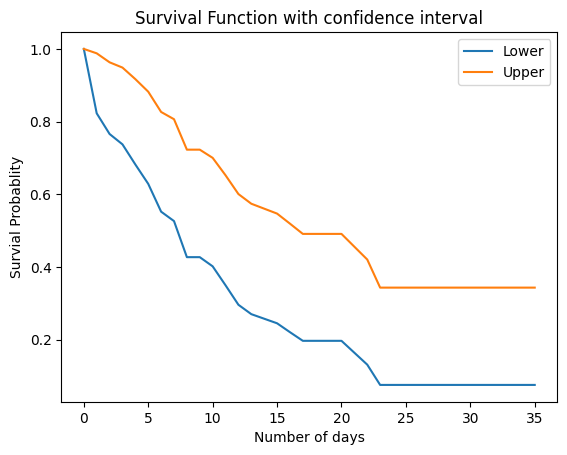

In [9]:
# Plot survival function with confidence interval
survival_confidence_interval = kmf.confidence_interval_survival_function_
plt.plot(survival_confidence_interval['KM_estimate_lower_0.95'], label="Lower")
plt.plot(survival_confidence_interval['KM_estimate_upper_0.95'], label="Upper")
plt.title("Survival Function with confidence interval")
plt.xlabel("Number of days")
plt.ylabel("Survial Probablity")
plt.legend()
plt.show()

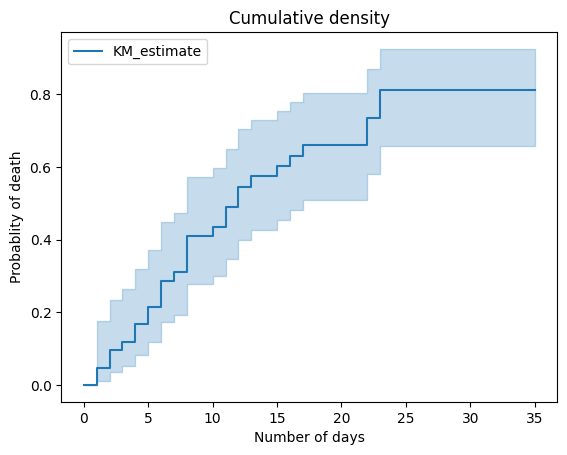

In [10]:
# Cumulative survival
cumu_surv = kmf.cumulative_density_
# Plot cumulative density
kmf.plot_cumulative_density()
plt.title("Cumulative density")
plt.xlabel("Number of days")
plt.ylabel("Probablity of death")
plt.show()

In [11]:
# KM for Male and Female
kmf_1 = KaplanMeierFitter()
kmf_0 = KaplanMeierFitter()
d1 = gehan.query("drug == '6-MP'")
d0 = gehan.query("drug == 'CONTROL'")
kmf_1.fit(durations=d1.week, event_observed=d1.remiss, label="d1")
kmf_0.fit(durations=d0.week, event_observed=d0.remiss, label="d0")


<lifelines.KaplanMeierFitter:"d0", fitted with 21 total observations, 0 right-censored observations>

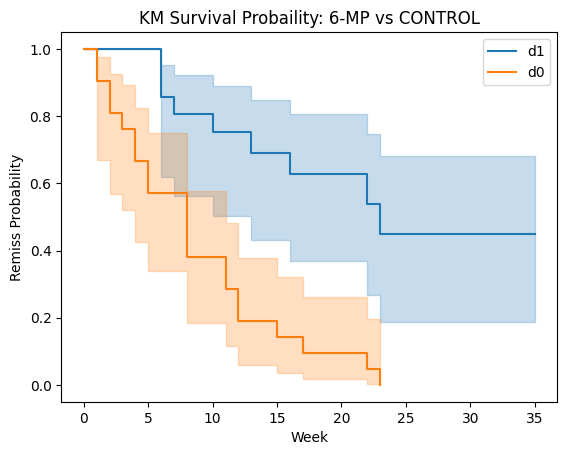

In [12]:
# Plot survival function
kmf_1.plot()
kmf_0.plot()
plt.title("KM Survival Probaility: 6-MP vs CONTROL")
plt.xlabel("Week")
plt.ylabel("Remiss Probability")
plt.show()

In [13]:
from lifelines.statistics import logrank_test

time_d1 = d1.week
event_d1 = d1.remiss

time_d0 = d0.week
event_d0 = d0.remiss

#log-rank
results = logrank_test(time_d1, time_d0, event_d1, event_d0)
results.print_summary()
print(results)
print("P-value: ", results.p_value)

#Generalized Wilcoxon
from lifelines.statistics import logrank_test
wilcoxon_result = logrank_test(time_d1, time_d0, event_d1, event_d0, weightings='wilcoxon')
print(wilcoxon_result)
print("P-value: ", wilcoxon_result.p_value)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55
P-value:  4.168809109334511e-05
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
          13.46 <0.005     12.00
P-value:  0.0002439829218905535


##2)Cox model

In [14]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DSAIcourse2025/refs/heads/main/%2304/pcancer.csv'

pcancer = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
pcancer

,CASENO,TIME,CENSOR,AGE,SEX,TREAT,BUI,CH,P,STAGE,PS
0,1,2.4,1,66,0,0,1,4,1,4,3
1,2,1.7,1,69,0,0,1,4,1,4,3
2,3,0.1,1,48,0,0,1,1,0,3,2
3,4,1.0,1,73,0,0,1,4,0,3,4
4,5,4.8,1,65,0,0,1,4,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...
78,92,3.1,1,62,0,1,1,3,0,3,3
79,93,3.2,1,47,0,1,1,3,0,4,3
80,94,1.9,1,62,0,1,1,1,0,4,3
81,95,2.1,1,55,0,1,1,1,1,3,2


In [15]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph_df=pcancer[
    ["STAGE","TREAT","AGE", "TIME", "CENSOR"]
    ]
cph.fit(cph_df,duration_col='TIME', event_col='CENSOR')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 83 total observations, 1 right-censored observations>
             duration col = 'TIME'
                event col = 'CENSOR'
      baseline estimation = breslow
   number of observations = 83
number of events observed = 82
   partial log-likelihood = -279.54
         time fit was run = 2025-09-08 07:46:59 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
STAGE      0.44      1.56      0.23           -0.01            0.89                0.99                2.44
TREAT     -0.70      0.50      0.27           -1.23           -0.17                0.29                0.84
AGE        0.01      1.01      0.01           -0.01            0.04                0.99                1.04

           cmp to     z    p  -log2(p)
covariate                             
STAGE        0.00  1.94 0.05      4.24
TREAT        0.00 -2.59 0.01      6.72
AGE          0.00  1.07 0.28      1.81
---
Concordance = 0.62
Partial AIC = 565.08
log-likelihood ratio test = 10.10 on 3 df
-log2(p) of ll-ratio test = 5.82

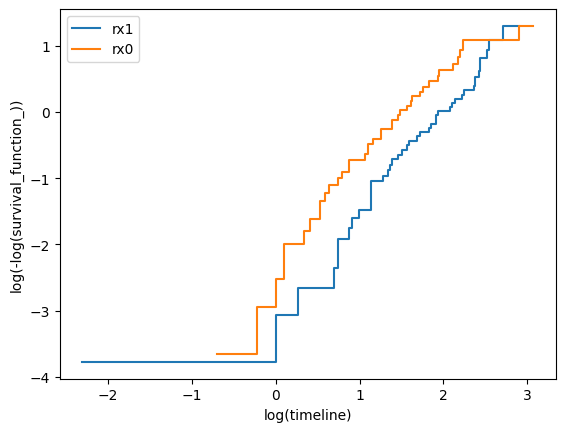

In [16]:
rx1=pcancer.loc[pcancer['STAGE']==3]
rx0=pcancer.loc[pcancer['STAGE']==4]

kmf1 = KaplanMeierFitter()
kmf1.fit(durations=rx1['TIME'], event_observed=rx1['CENSOR'], label="rx1")
kmf0 = KaplanMeierFitter()
kmf0.fit(durations=rx0['TIME'], event_observed=rx0['CENSOR'], label="rx0")

fig, axes= plt.subplots()

kmf1.plot_loglogs(ax=axes)
kmf0.plot_loglogs(ax=axes)

axes.legend (['rx1','rx0'])
plt.show()


Schoenfeld residual plot


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.1110)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1048)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8929)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8209)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1725)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1980)'>]]

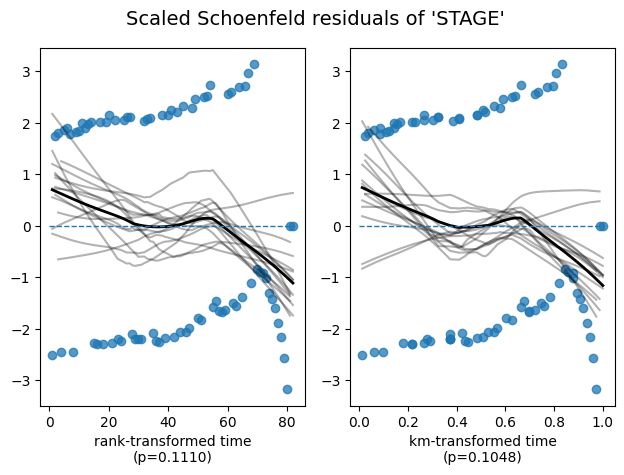

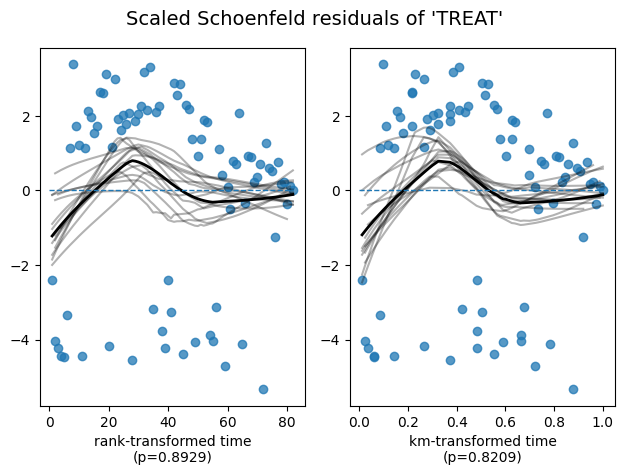

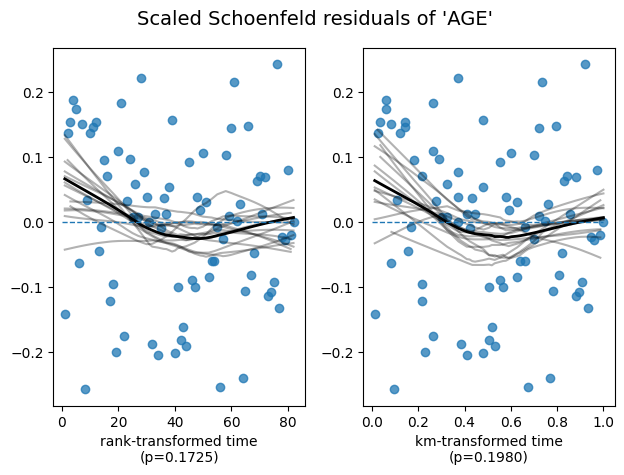

In [17]:
cph.check_assumptions(cph_df, p_value_threshold=0.05, show_plots=True)

In [18]:

pcancer_strata_age = pcancer.copy()
# Change 'age' to 'AGE' to match the column name in the DataFrame
pcancer_strata_age['age_strata'] = pd.cut(pcancer_strata_age['AGE'],bins=[40,50,60,70,100])

pcancer_strata_age[['AGE', 'age_strata']].head() # Change 'age' to 'AGE' here as well

,AGE,age_strata
0,66,"(60, 70]"
1,69,"(60, 70]"
2,48,"(40, 50]"
3,73,"(70, 100]"
4,65,"(60, 70]"


In [19]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph_df = pcancer_strata_age[["STAGE", "TREAT", "age_strata", "TIME", "CENSOR"]]

cph_df = pd.get_dummies(cph_df, columns=['age_strata'], drop_first=True)

cph.fit(cph_df, duration_col='TIME', event_col='CENSOR')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 83 total observations, 1 right-censored observations>
             duration col = 'TIME'
                event col = 'CENSOR'
      baseline estimation = breslow
   number of observations = 83
number of events observed = 82
   partial log-likelihood = -277.05
         time fit was run = 2025-09-08 07:47:12 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
STAGE                 0.41      1.51      0.23           -0.04            0.86                0.96                2.37
TREAT                -0.69      0.50      0.27           -1.21           -0.16                0.30                0.86
age_strata_(50, 60]  -0.52      0.59      0.35           -1.20            0.16                0.30                1.18
age_strata_(60, 70]  -0.04      0.96      0.32           -0.68            0.59                0.51                1.80
age_strata_(70, 100]  0.30      1.35      0.39           -0.46            1.06                0.63                2.89

                      cmp to     z    p  -log2(p)
covariate                                        
STAGE                   0.00  1.78 0.08      3.73
TREAT                   0.00 -2.54 0.01      6.48
age_strata_(50, 60]     0.00 -1.50 0.13      2.89
age_strata_(60, 70]     0.00 -0.14 0.89      0.17
age_strata_(70, 100]    0.00  0.78 0.44      1.19
---
Concordance = 0.64
Partial AIC = 564.11
log-likelihood ratio test = 15.07 on 5 df
-log2(p) of ll-ratio test = 6.64


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.1379)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1310)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9675)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8984)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9055)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8716)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2551)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2891)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3137)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3433)'>]]

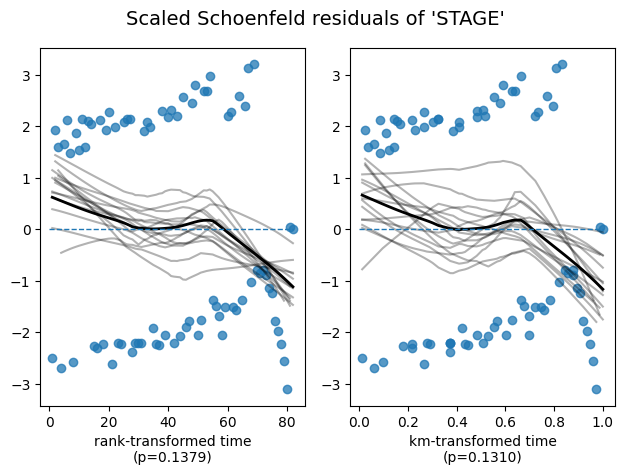

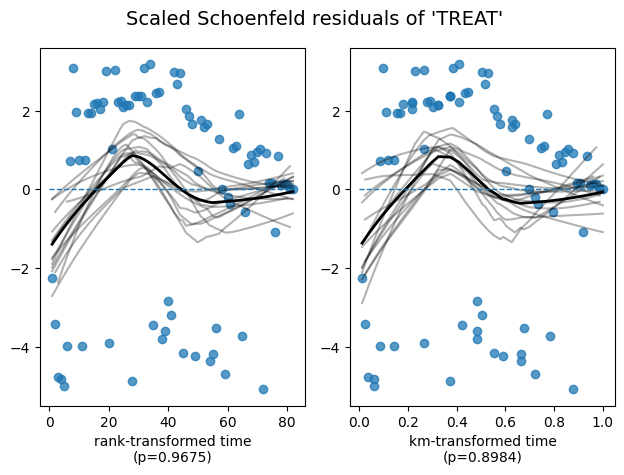

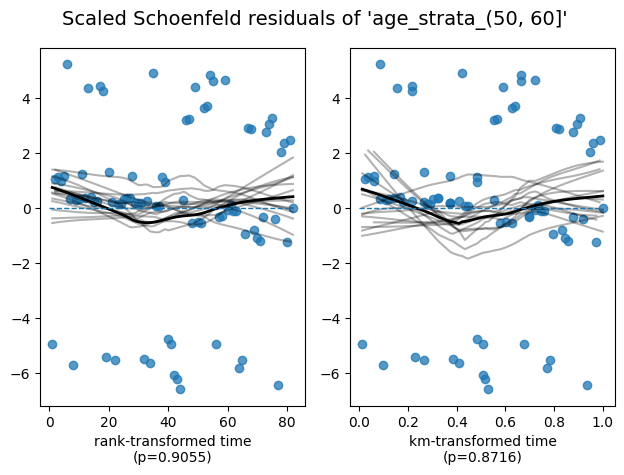

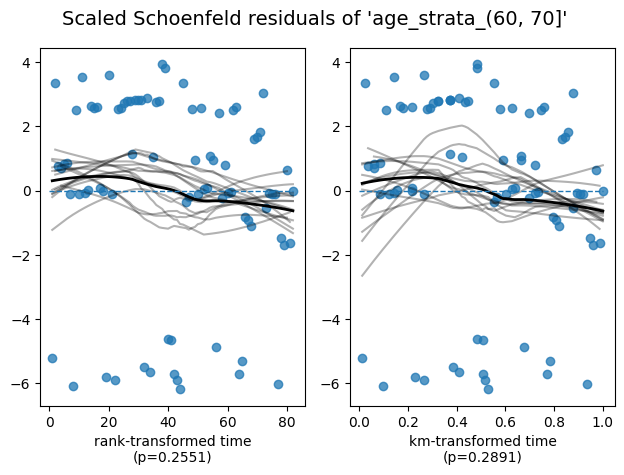

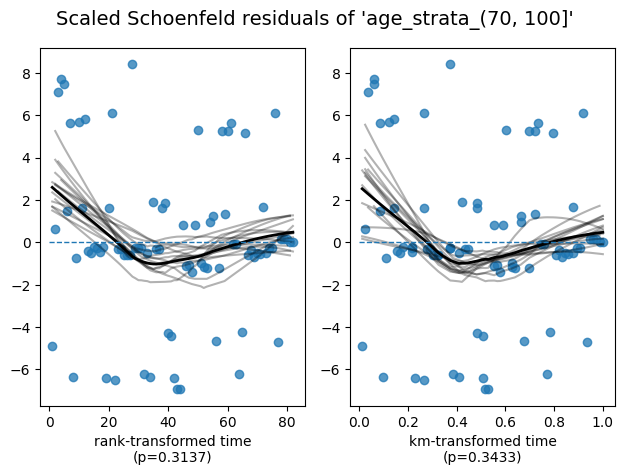

In [20]:
cph.check_assumptions(cph_df, p_value_threshold=0.05, show_plots=True)

<Axes: xlabel='TIME', ylabel='martingale'>

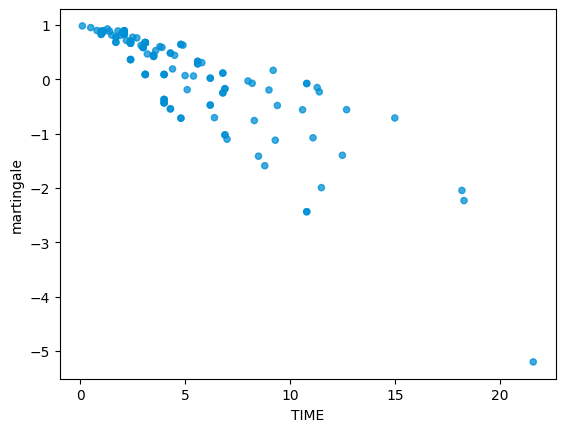

In [22]:
r = cph.compute_residuals(cph_df, 'martingale')
r.head()

# Merge the residuals DataFrame with the original DataFrame to get the 'AGE' column
r = pd.merge(r, pcancer_strata_age[['TIME', 'AGE']], on='TIME', how='left')

r.plot.scatter(
    x='TIME', y='martingale', c=np.where(r['AGE'], '#008fd5', '#fc4f30'),
    alpha=0.75
)

In [23]:
from lifelines.utils import restricted_mean_survival_time
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter

df = load_waltons()
ix = df['group'] == 'miR-137'
T, E = df['T'], df['E']

time_limit = 50

kmf_exp = KaplanMeierFitter().fit(T[ix], E[ix], label='exp')
rmst_exp = restricted_mean_survival_time(kmf_exp, t=time_limit)

kmf_con = KaplanMeierFitter().fit(T[~ix], E[~ix], label='control')
rmst_con = restricted_mean_survival_time(kmf_con, t=time_limit)

In [24]:
load_waltons


<function lifelines.datasets.load_waltons(**kwargs)>

<Axes: xlabel='timeline'>

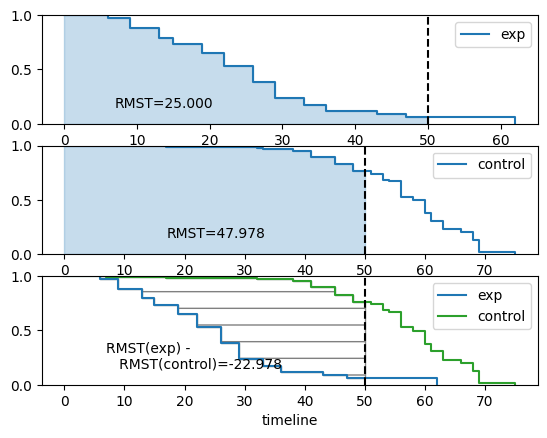

In [25]:
from matplotlib import pyplot as plt
from lifelines.plotting import rmst_plot

ax = plt.subplot(311)
rmst_plot(kmf_exp, t=time_limit, ax=ax)


ax = plt.subplot(312)
rmst_plot(kmf_con, t=time_limit, ax=ax)


ax = plt.subplot(313)
rmst_plot(kmf_exp, model2=kmf_con, t=time_limit, ax=ax)

<lifelines.SplineFitter:"SplineFitter: 2 internal knot", fitted with 686 total observations, 387 right-censored observations>


<Axes: >

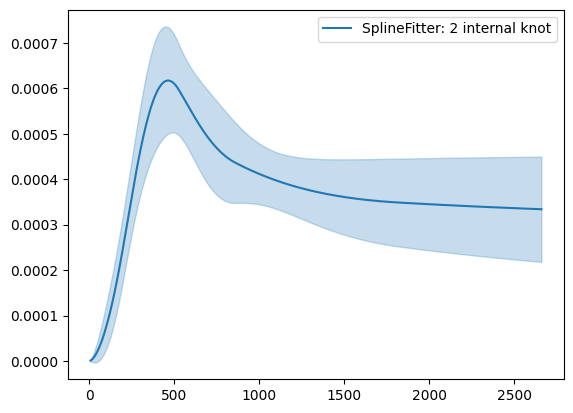

In [26]:
from lifelines.utils import find_best_parametric_model
from lifelines.datasets import load_lymph_node

T = load_lymph_node()['rectime']
E = load_lymph_node()['censrec']

best_model, best_aic_ = find_best_parametric_model(T, E, scoring_method="AIC")

print(best_model)
# <lifelines.SplineFitter:"Spline_estimate", fitted with 686 total observations, 387 right-censored observations>

best_model.plot_hazard()

In [27]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2304/Ageing_surv.csv'
#１行目（pythonでは0行と指定）を見出しにする。日本語を含むためエラーが出ることが多いので、[Shift-jis]で読み込み
Ag = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [28]:
# Kaplan-Meier-Fitter
kmf = KaplanMeierFitter()
kmf.fit(durations = Ag.followup, event_observed = Ag.censor)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 20 total observations, 14 right-censored observations>

In [29]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,20,20
1.0,1,1,0,0,20
2.0,1,0,1,0,19
3.0,1,1,0,0,18
5.0,1,1,0,0,17
6.0,1,0,1,0,16
9.0,1,0,1,0,15
10.0,1,0,1,0,14
11.0,1,0,1,0,13


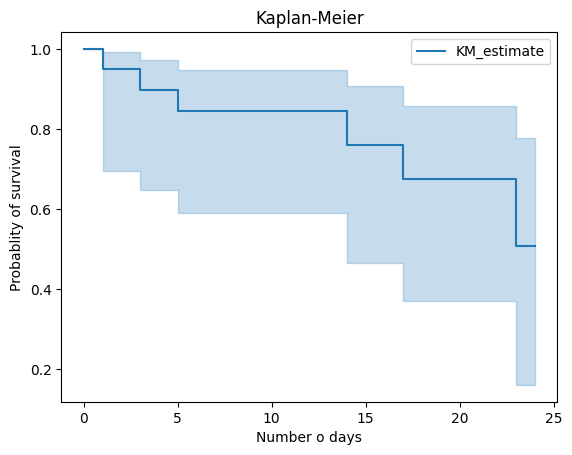

In [30]:
# Plot the survival graph
kmf.plot()
plt.title("Kaplan-Meier")
plt.xlabel("Number o days")
plt.ylabel("Probablity of survival")
plt.show()

In [31]:
# KM for Male and Female
kmf_1 = KaplanMeierFitter()
kmf_0 = KaplanMeierFitter()
d1 = Ag.query("Drug == 1")
d0 = Ag.query("Drug == 0")
kmf_1.fit(durations=d1.followup, event_observed=d1.censor, label="d1")
kmf_0.fit(durations=d0.followup, event_observed=d0.censor, label="d0")


<lifelines.KaplanMeierFitter:"d0", fitted with 10 total observations, 9 right-censored observations>

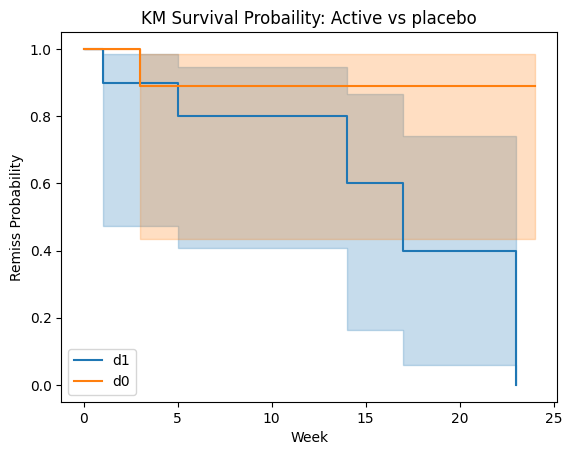

In [32]:
# Plot survival function
kmf_1.plot()
kmf_0.plot()
plt.title("KM Survival Probaility: Active vs placebo")
plt.xlabel("Week")
plt.ylabel("Remiss Probability")
plt.show()